# Foundational Components of Neural Networks

## Perceptron

A Perceptron is a fundamental or simplest possible neural network which takes weighted inputs, process it and capable of performing binary classifications. A binary classifier is a function which can decide whether an input, represented by a vector of numbers, belongs to some specific class or not.

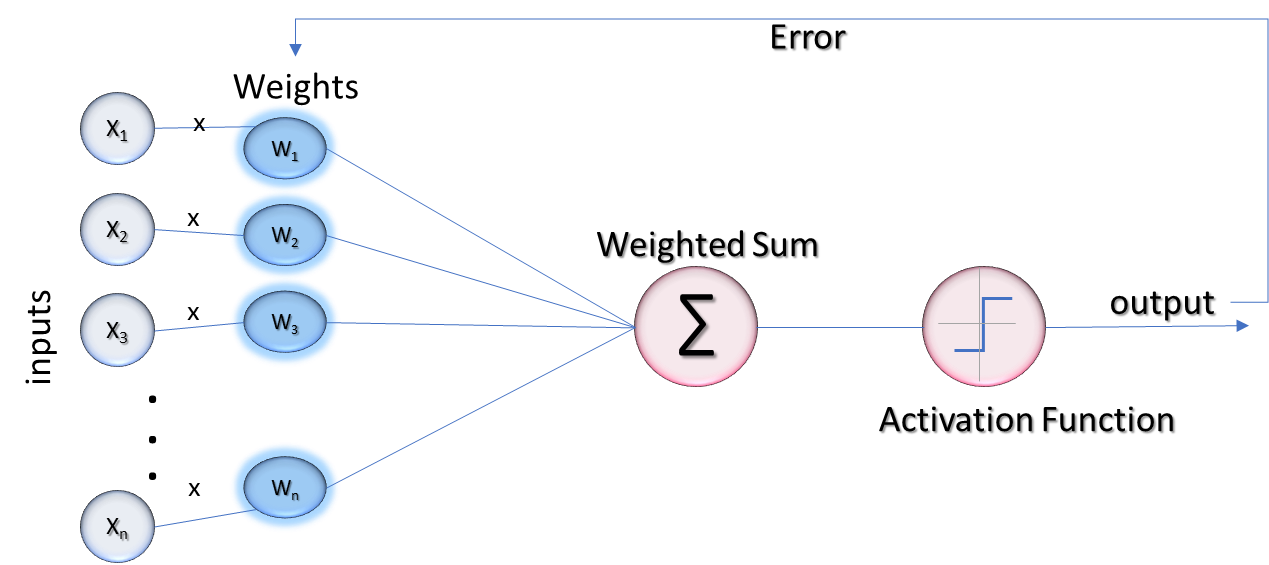

The appropriate weights are applied to the inputs, and the resulting weighted sum passed to a function that produces the output. The activation function applies a step rule to check if the output of the weighting functions is greater than zero or not.

Step function is triggered above a certain value of the neuron output, else it outputs zero. 

### Basic Components of Perceptron

1. **Input Layer:** The input layer consists of neurons, each representing a feature of the input data. These neurons receive the input values and pass them onto the next layer.
2. **Weights:**  Each input feature is associated with a weight, which represents its importance in the classification process. These weights are multiplied by the input values to compute the weighted sum.
3. **Weighted Sum:** The weighted sum is computed by multiplying each input feature by its corresponding weight and summing up these products. Mathematically, it can be represented as the dot product of the input vector and the weight vector.
4. **Activation Function**: The weighted sum is then passed through an activation function, which introduces non-linearity into the model. The activation function determines whether the neuron should be activated or not based on the computed sum. Common activation functions used in perceptrons include the step function or sigmoid function.
5. **Bias:** A bias term is added to the input layer to provide the perceptron with additional flexibility in modeling complex patterns in the input data.
6. **Output:** The output of the perceptron is the result of the activation function applied to the weighted sum plus the bias term. For binary classification tasks, the output could be a binary value indicating the predicted class (e.g., 0 or 1).
7. **Error:** In the Perceptron learning rule, the predicted output is compared with the known output. If it doesn't match, the error is propagated backward to allow weight adjustment to happen.
8. **Training Algorithm:** The perceptron is trained using a supervised learning algorithm called the perceptron learning algorithm (PLA). During training, the weights are adjusted iteratively to minimize the classification error. This adjustment is based on the error between the predicted output and the true output.

### Training of a Perceptron
Following steps are carried out while training a perceptron:

1. Define a variable for learning rate.
2. multiply the weights and biases with the input and calculate the sum called the weighted sum.
3. Pass it through the activation function
4. Substract the output from the actual value to calculate loss
5. Update the weights based on the loss multiplied by the learning rate
6. Repeat the process untill the model converges or till number of training steps(iterations) specified.

Below is a simple implementation of a perceptron classifier in Python using Numpy. This implementation demonstrates how a perceptron can be trained to classify linearly separable data.

In [63]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        # Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(X.shape[0]):
                # Compute the predicted value using sigmoid activation
                predicted = self.sigmoid(np.dot(X[i], self.weights) + self.bias)
                # Update weights and bias
                self.weights += self.learning_rate * (y[i] - predicted) * predicted * (1 - predicted) * X[i]
                self.bias += self.learning_rate * (y[i] - predicted) * predicted * (1 - predicted)

    def predict(self, X):
        # Compute the predicted values using sigmoid activation
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(self.sigmoid(linear_output) >= 0.5, 1, 0)



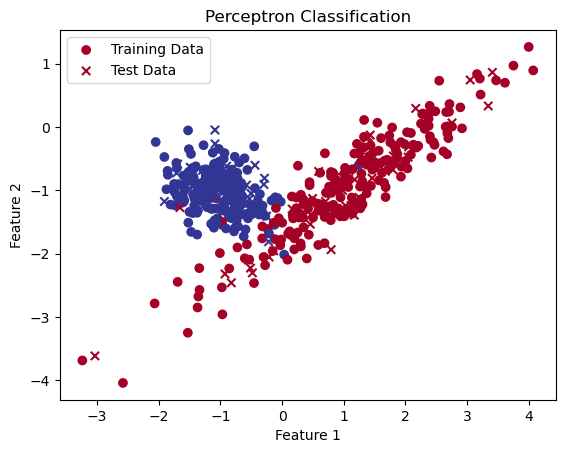

In [69]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a random linearly separable dataset
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_clusters_per_class=1)
y = np.where(y==0, -1, 1)  # Convert 0 labels to -1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, marker='o', label='Training Data')
# Plot the test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, marker='x', label='Test Data')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Classification')
plt.legend()
plt.show()

# print(X_train, y_train)

In [70]:
# Create and train a perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=1000)
perceptron.fit(X_train, y_train)

# Test the trained perceptron
predictions = perceptron.predict(X_test)
print("Predictions:", predictions)

Predictions: [0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0]


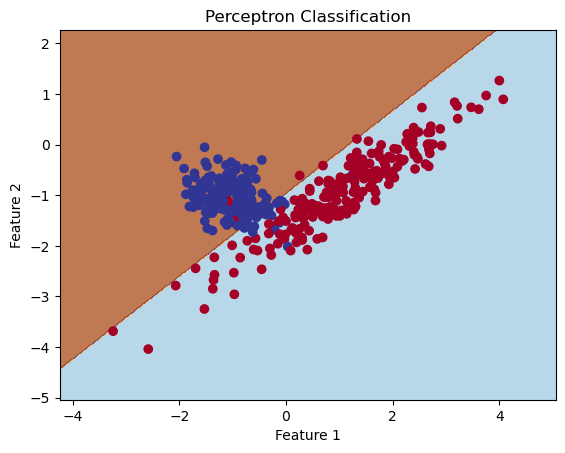

In [71]:
import matplotlib.pyplot as plt

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Classification')
plt.show()

### Limitations of Perceptron Model

1. **Linear Separability:** Perceptrons can only learn linearly separable patterns. This means that if the data cannot be separated by a single linear decision boundary, the perceptron will fail to converge to a solution.
2. **Binary Classification Only:** Perceptrons are inherently binary classifiers, meaning they can only classify inputs into two categories. They cannot handle multi-class classification problems directly.
3. **Inability to Learn Complex Patterns:** Perceptrons have limited representational power and cannot learn complex patterns or relationships in the data. They are not suitable for tasks that require capturing hierarchical or non-linear relationships.
4. **Sensitivity to Feature Scaling:** Perceptrons are sensitive to the scale of input features. If the input features are not properly scaled, it can affect the convergence of the model and the quality of the learned decision boundary.
5. **Single-Layer Architecture:** Perceptrons have a single layer of neurons, limiting their ability to model complex functions. More advanced neural network architectures with multiple layers (deep learning) have been developed to overcome this limitation.